10


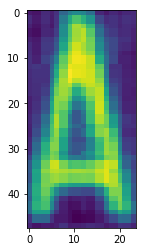

10


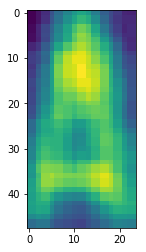

9


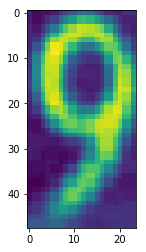

11


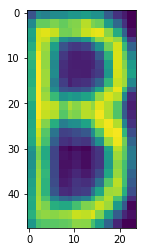

4


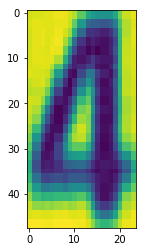

3


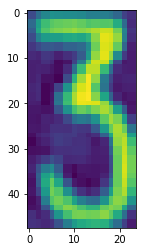

12


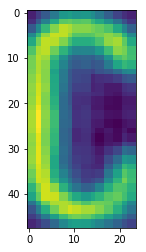

3


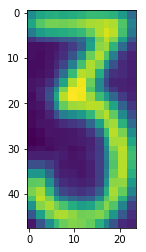

2


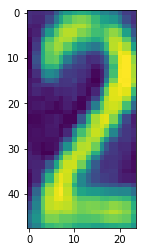

7


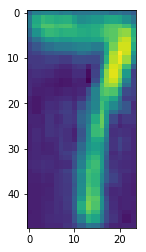

----------------------------------------------------------------------------------
10


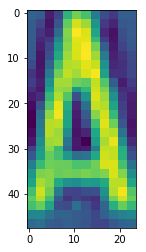

11


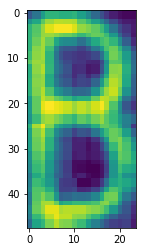

13


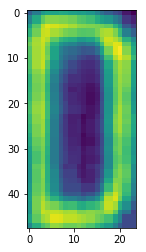

10


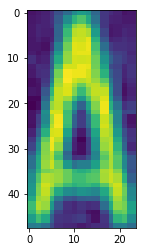

10


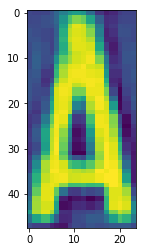

6


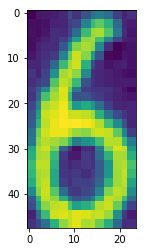

7


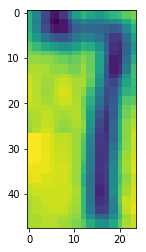

0


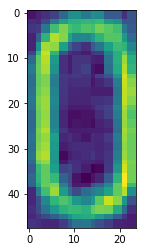

1


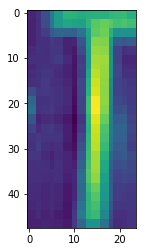

9


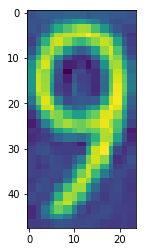

----------------------------------------------------------------------------------


In [5]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image


TfileNameQue = tf.train.string_input_producer(["tfrecords/test.tfrecords"])
Treader = tf.TFRecordReader()
Tkey,Tvalue = Treader.read(TfileNameQue)
Tfeatures = tf.parse_single_example(Tvalue,features={ 'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string)})

Timage = tf.decode_raw(Tfeatures["img_raw"], tf.uint8)
Timage=tf.cast(Timage,tf.float64)
Timage=tf.reshape(Timage,[48,24,3])
Timage=tf.split(Timage,3,2)[0]

Tlabel=Tfeatures['label']
Tlabel = tf.cast(Tlabel, tf.int32)
init = tf.global_variables_initializer()

TimageBatch, TlabelBatch = tf.train.shuffle_batch([Timage, Tlabel], batch_size = 10,capacity = 2000, min_after_dequeue = 1900)

with tf.Session() as sess:

    sess.run(init)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    for i in range(2):
#         img, lab = sess.run([image, label])
#         print(img.shape)
#         print(lab)
        img,lab=sess.run([TimageBatch, TlabelBatch])
#         print(lab)
#         print(img.shape)
#         img=img[i].reshape([48,24])
        for j in range(10):
#             print(img.shape)
            im = img[j].reshape([48,24])
            print(lab[j])
#             print(img.shape)
#             print(img[i].shape)
#             print(im.shape)
            result = Image.fromarray(im,'L')

            plt.imshow(im)
            plt.show()


            result.save('./test_images/'+str(i) +'_'+str(lab)+ '.png', 'png')
        print('----------------------------------------------------------------------------------')

    coord.request_stop()
    coord.join(threads)